# Dependance of transmission vs Ozone in Huggins band times airmass
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/25
- last update : 2024/12/03

Ozone absorbs ultraviolet radiation in three main regions known as the Hartley band, the Huggins band and the Chappuis bands. The Hartley band is a wide bell-shaped peak from 200 - 310nm. The Huggins band is a structured region from 310 - 350nm, and the Chappuis bands are found between 450 and 850 nm.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os,sys
import pickle
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
import getObsAtmo as obs

In [4]:
OBS_tag = 'LSST'

In [5]:
obs.__path__

['/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/getObsAtmo']

In [6]:
from getObsAtmo.getObsAtmo import ObsAtmo,Dict_Of_sitesPressures,getObsSiteDataFrame,_getPackageDir

In [7]:

__all__ = ['Dict_Of_sitesAltitudes',
           'Dict_Of_sitesPressures',
           'Dict_Of_sitesAliases',
           'file_data_dict',
           '_getPackageDir',
           'get_obssite_keys',
           'sanitizeString',
           'validateObsName', 
           'is_obssite', 
           'ObsAtmo','ObsAtmoPressure','ObsAtmoGrid']


# preselected sites
Dict_Of_sitesAltitudes = {'LSST': 2.663,
                          'CTIO': 2.207,
                          'OHP': 0.65,
                          'PDM': 2.8905,
                          'OMK': 4.205,
                          'OSL': 0.000,
                          }
# pressure calculated by libradtran
Dict_Of_sitesPressures = {'LSST': 731.50433,
                          'CTIO': 774.6052,
                          'OHP': 937.22595,
                          'PDM': 710.90637,
                          'OMK': 600.17224,
                          'OSL': 1013.000,
                          }

Dict_Of_sitesAliases = {'LSST': ['Rubin','Rubin Observatory','Auxtel'],
                        'CTIO': ["Cerro Tololo"],
                        'OHP': ["Observatoire de Haute Provence"],
                        'PDM': ["Pic du Midi","Observatoire du Pic du Midi"],
                        'OMK': ["Mauna Kea","Mauna Kea Observatory"],
                        'OSL': ["Sea Level","Sea Level Observatory"]
                        }

file_data_dict = {
    "info": "atmospherictransparencygrid_params.pickle",
    "data_rayleigh": "atmospherictransparencygrid_rayleigh.npy",
    "data_o2abs": "atmospherictransparencygrid_O2abs.npy",
    "data_pwvabs": "atmospherictransparencygrid_PWVabs.npy",
    "data_ozabs": "atmospherictransparencygrid_OZabs.npy",
}

In [8]:
# construct the path of input data file
path = os.path.join(_getPackageDir(), '../obsatmo_data')
info_params = {}

# load all data files (training and test)
filename = os.path.join(path, OBS_tag + "_" + file_data_dict["info"])
with open(filename, 'rb') as f:
    info_params = pickle.load(f)

data_rayleigh = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_rayleigh"]))
data_O2abs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_o2abs"]))
data_PWVabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_pwvabs"]))
data_OZabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_ozabs"]))

In [9]:
# setup training dataset (those used for interpolation)
WLMIN = info_params["WLMIN"]
WLMAX = info_params["WLMAX"]
WLBIN = info_params["WLBIN"]
NWLBIN = info_params['NWLBIN']
WL     = info_params['WL']
OBS = info_params['OBS']

AIRMASSMIN = info_params['AIRMASSMIN']
AIRMASSMAX = info_params['AIRMASSMAX']
NAIRMASS = info_params['NAIRMASS']
DAIRMASS = info_params['DAIRMASS']
AIRMASS = info_params['AIRMASS']

PWVMIN = info_params['PWVMIN']
PWVMAX = info_params['PWVMAX']
NPWV = info_params['NPWV']
DPWV = info_params['DPWV']
PWV = info_params['PWV']

OZMIN = info_params['OZMIN']
OZMAX = info_params['OZMAX']
NOZ = info_params['NOZ']
DOZ = info_params['DOZ']
OZ = info_params['OZ']


In [10]:
data_PWVabs.shape

(800, 34, 62)

In [11]:
data_PWVabs.min()

0.1424384142438414

# Check information

In [12]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [13]:
obs_str = 'LSST'

In [14]:
emul =  ObsAtmo(obs_str=obs_str)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

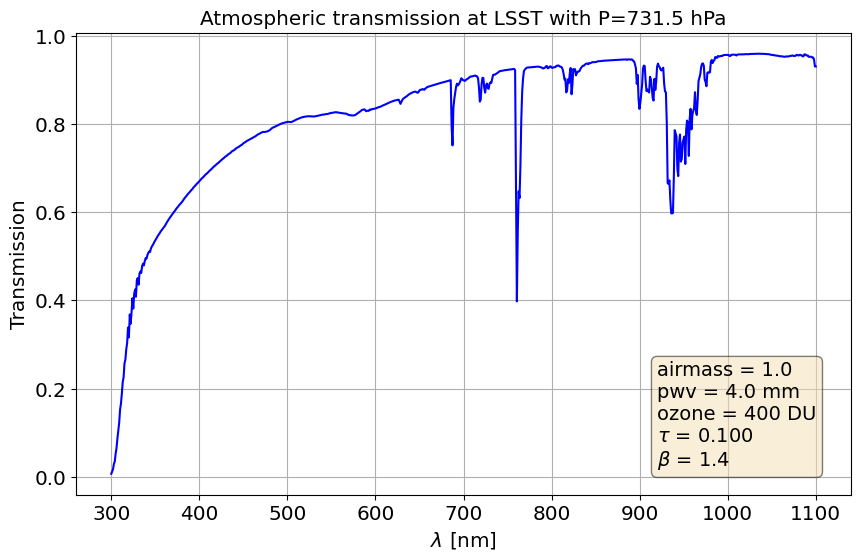

In [15]:
emul.plot_transmission()

# Setting atmospheric parameters

In [16]:
WL = emul.GetWL()
airmasses = emul.AIRMASS
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

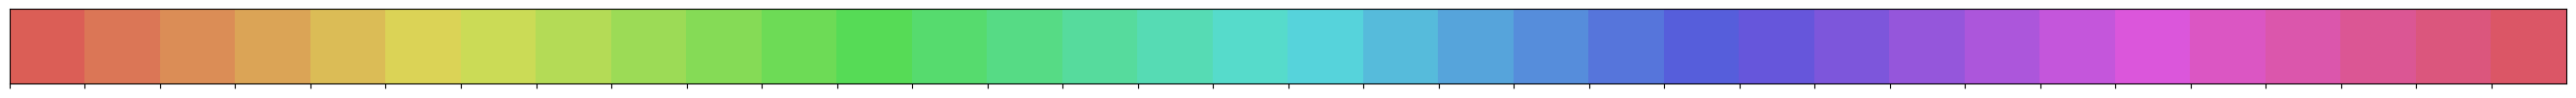

In [17]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Ozone absorption

- expect no difference

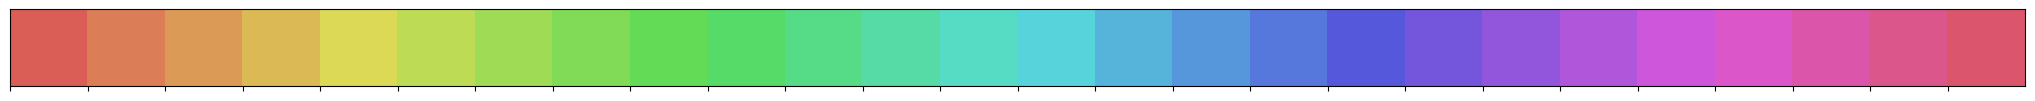

In [18]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


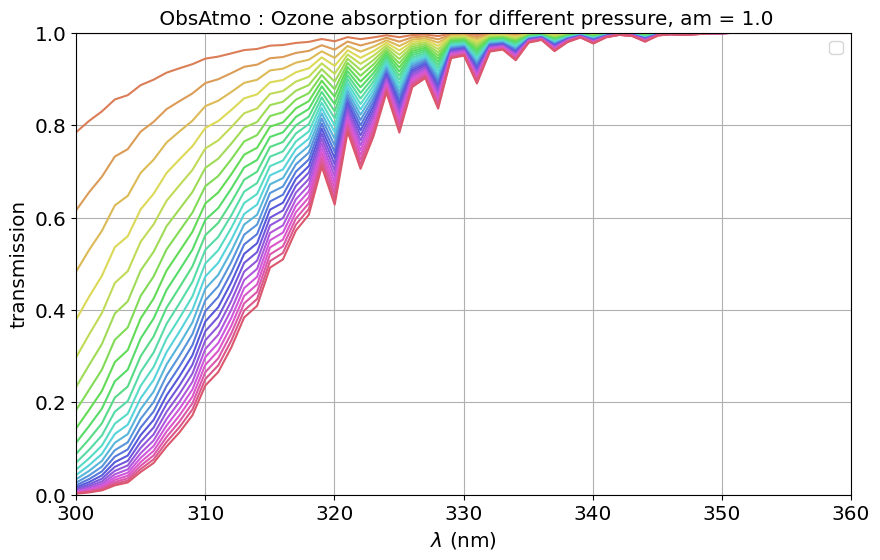

In [19]:
am =1

fig, ax = plt.subplots()
for idx,oz in enumerate(ozs):

    transm = emul.GetOZabsTransparencyArray(WL,am,oz)

    
    if idx == 0:
        ax.plot(WL,transm,"-",color=hls_colors[idx],label="")
    else:
        ax.plot(WL,transm,"-",color=hls_colors[idx])
     
title = f" ObsAtmo : Ozone absorption for different pressure, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,360.)
ax.set_ylim(0.,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Predefine a series of wavelengths

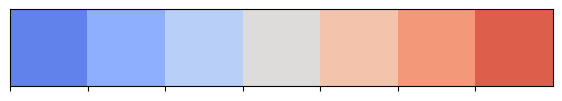

In [20]:
WLtest = np.array([300.,310.,320.,330., 340.,350.,400.])
NWLtest = len(WLtest)
#hls_colors = sns.color_palette("Spectral_r", NWLtest)
hls_colors = sns.color_palette("coolwarm",NWLtest)
sns.palplot(hls_colors)

In [21]:
binnumber = np.digitize(WLtest,WLtest)
binnumber

array([1, 2, 3, 4, 5, 6, 7])

## Different values of Ozone and different airmasses

In [22]:
all_oz0 = np.array([1.,5.,10.,100.,200.,300.,400.,500.])
all_oz0

array([  1.,   5.,  10., 100., 200., 300., 400., 500.])

## Plot

In [23]:
linestyles = ["-","--","-.",":",  "-","--","-.",":"]
linewidths = [4,4,4,4,2,2,2,2]

### Plot linear scale

Text(0.5, 1.0, 'Ozone Air transmission vs $airmass \\times ozone$ in Huggins band')

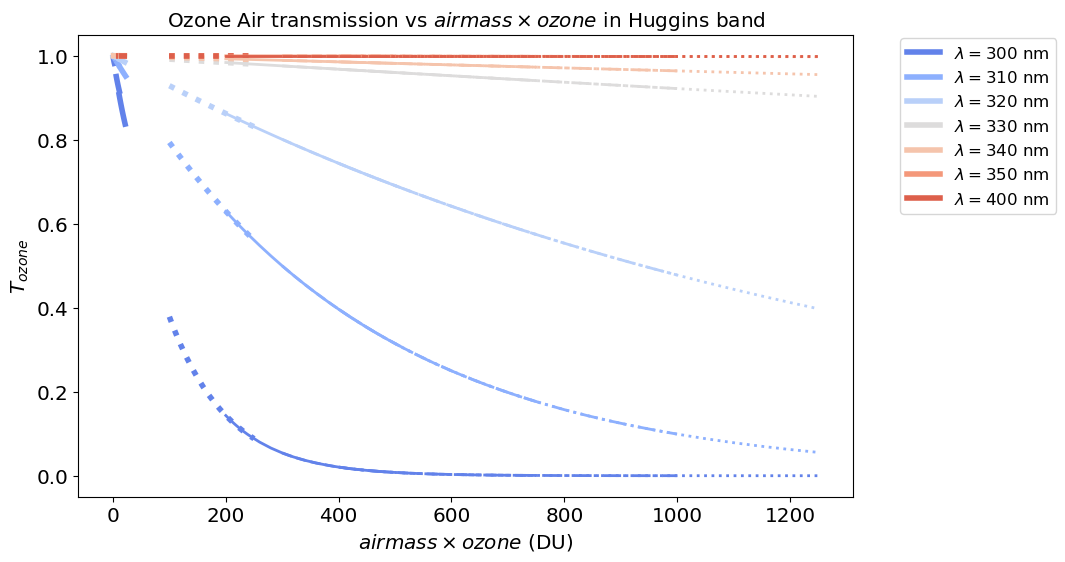

In [24]:
fig,ax = plt.subplots(1,1)

# external loop on Ozone (linestyles and width)

for idx_oz,oz0 in enumerate(all_oz0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = airmasses*oz0
        y = transmarray[:,idx_wl]
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_oz]
        lw = linewidths[idx_oz]

        if idx_oz==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='lower left')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass \\times ozone$ (DU)")  
ax.set_ylabel("$T_{ozone}$")  
ax.set_title("Ozone Air transmission vs $airmass \\times ozone$ in Huggins band")

Text(0.5, 1.0, 'Ozone extinction vs $airmass \\times ozone$ in Huggins band')

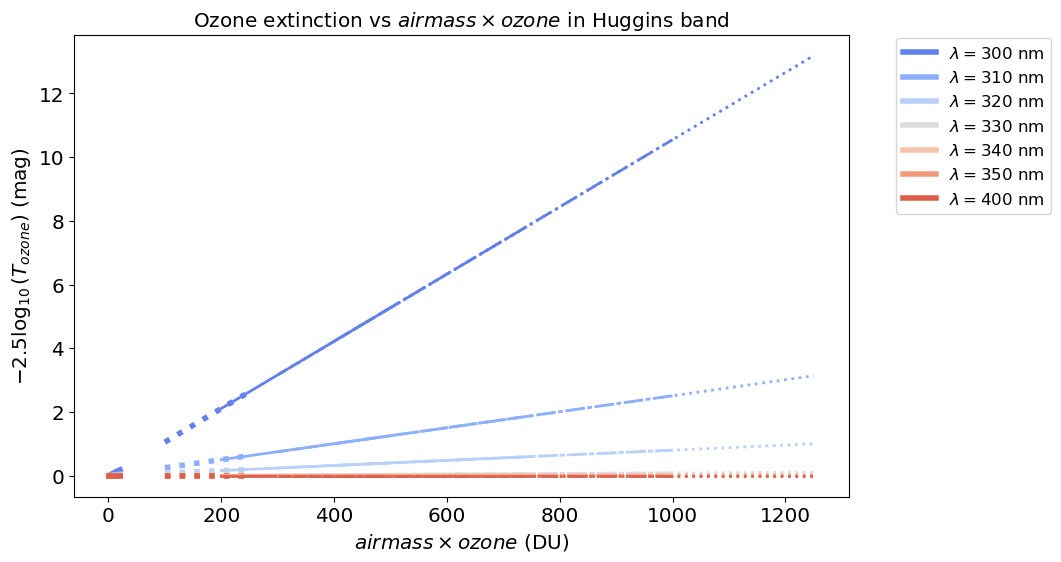

In [25]:
fig,ax = plt.subplots(1,1)

# external loop on Ozone (linestyles and width)

for idx_oz,oz0 in enumerate(all_oz0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = airmasses*oz0
        y = -2.5*np.log10(transmarray[:,idx_wl])
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_oz]
        lw = linewidths[idx_oz]

        if idx_oz==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='lower right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass \\times ozone$ (DU)")  
ax.set_ylabel("$-2.5\\log_{10}(T_{ozone})$ (mag)")  
ax.set_title("Ozone extinction vs $airmass \\times ozone$ in Huggins band")

Text(0.5, 1.0, 'Ozone extinction vs $airmass \\times ozone$ in Huggins band')

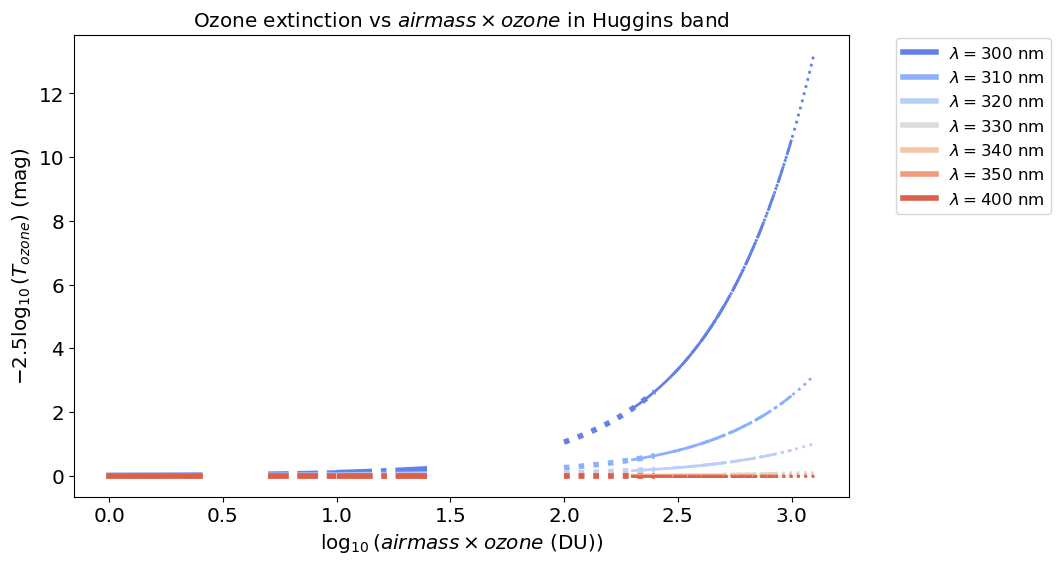

In [26]:
fig,ax = plt.subplots(1,1)

# external loop on Ozone (linestyles and width)

for idx_oz,oz0 in enumerate(all_oz0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = np.log10(airmasses*oz0)
        y = -2.5*np.log10(transmarray[:,idx_wl])
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_oz]
        lw = linewidths[idx_oz]

        if idx_oz==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='lower right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$\\log_{10}(airmass \\times ozone$ (DU))")  
ax.set_ylabel("$-2.5\\log_{10}(T_{ozone})$ (mag)")  
ax.set_title("Ozone extinction vs $airmass \\times ozone$ in Huggins band")